In [1]:
#Importación de librerías Requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf
import time




In [2]:
import pandas as pd
file_path = 'bank-full.csv'
df = pd.read_csv(file_path)
df = pd.read_csv(file_path, sep=';')  
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 0


In [5]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 0


In [6]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# Verificar los tipos de datos de las columnas
print(df.dtypes)

age          int64
job            str
marital        str
education      str
default        str
balance      int64
housing        str
loan           str
contact        str
day          int64
month          str
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome       str
y              str
dtype: object


In [8]:
types = df.dtypes.value_counts()
print('Data Types and Frequency in Dataset:')
print(types)

Data Types and Frequency in Dataset:
str      10
int64     7
Name: count, dtype: int64


In [9]:
# Seleccionar columnas categóricas, enteras y de punto flotante
catcols = df.select_dtypes(exclude=['int64', 'float64']).columns
intcols = df.select_dtypes(include=['int64']).columns
floatcols = df.select_dtypes(include=['float64']).columns



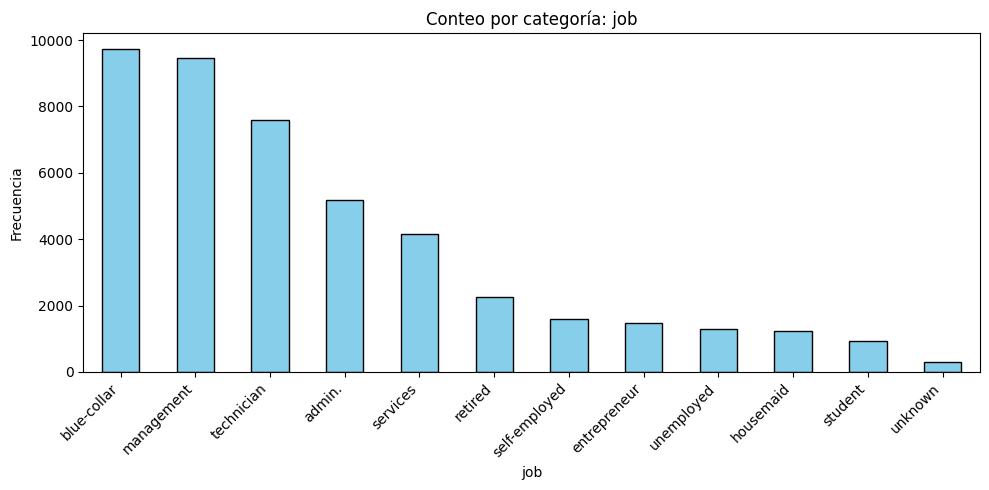

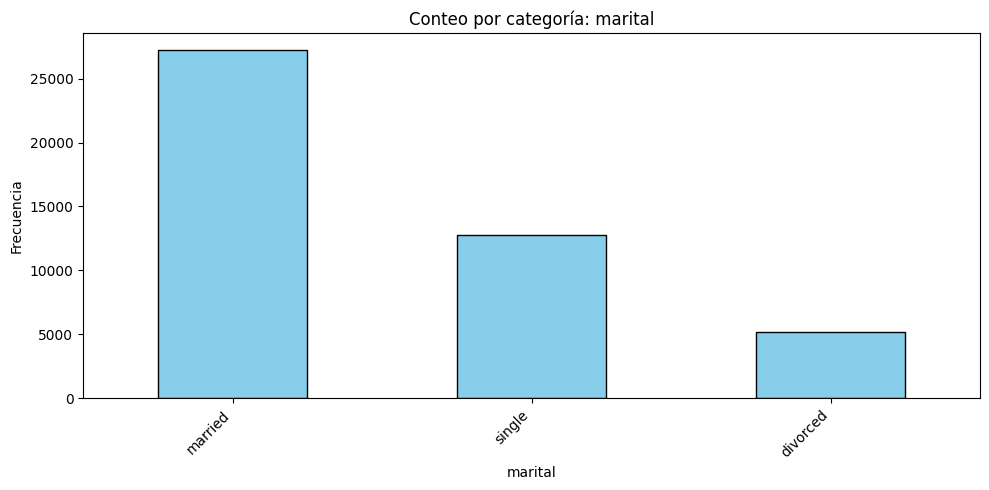

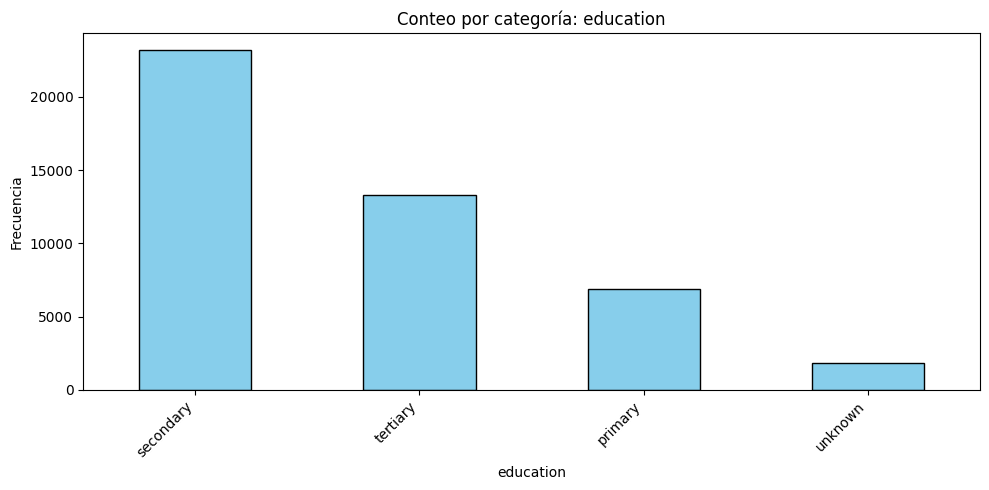

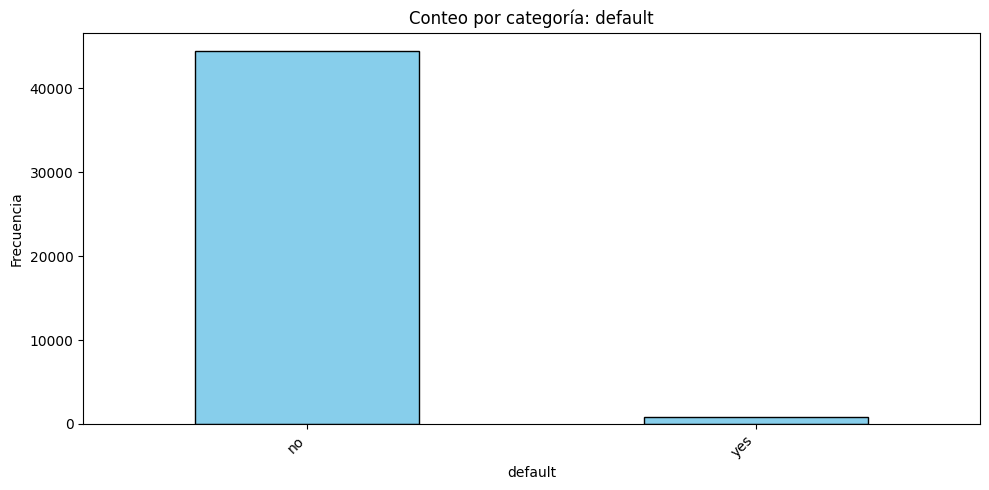

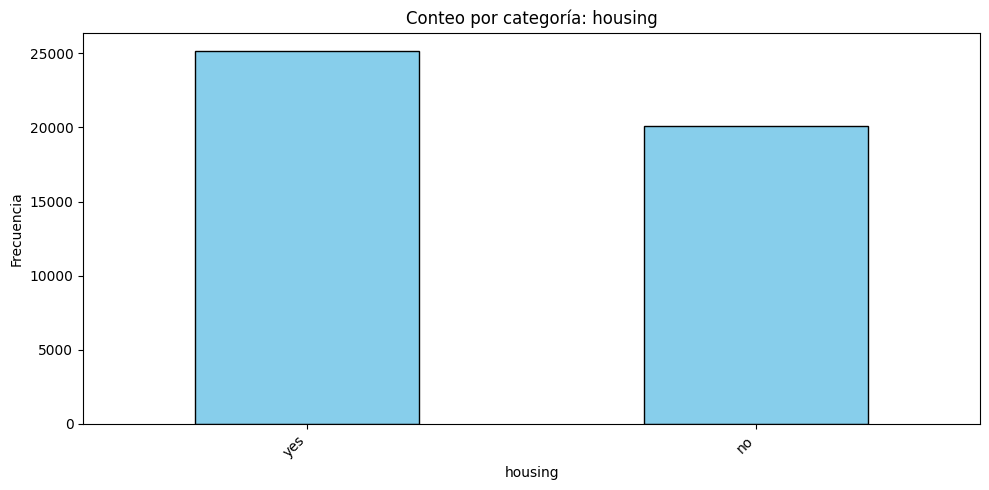

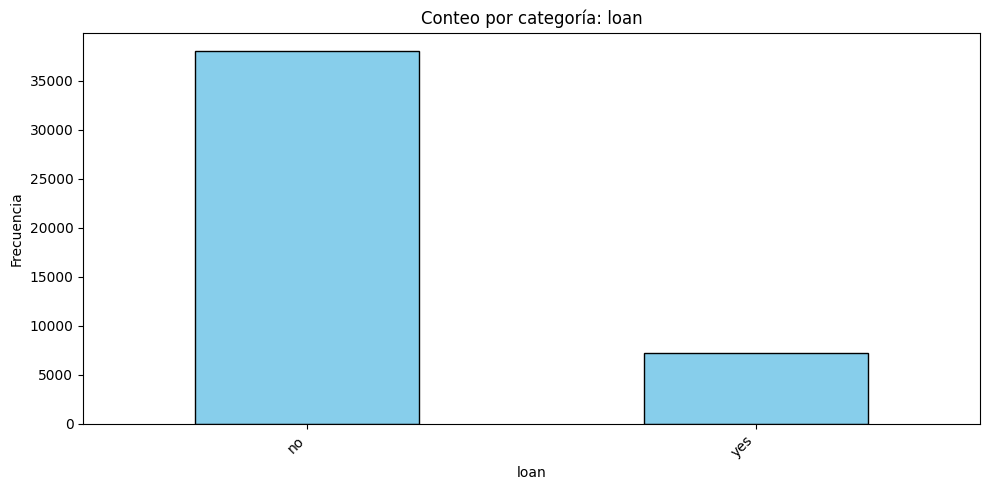

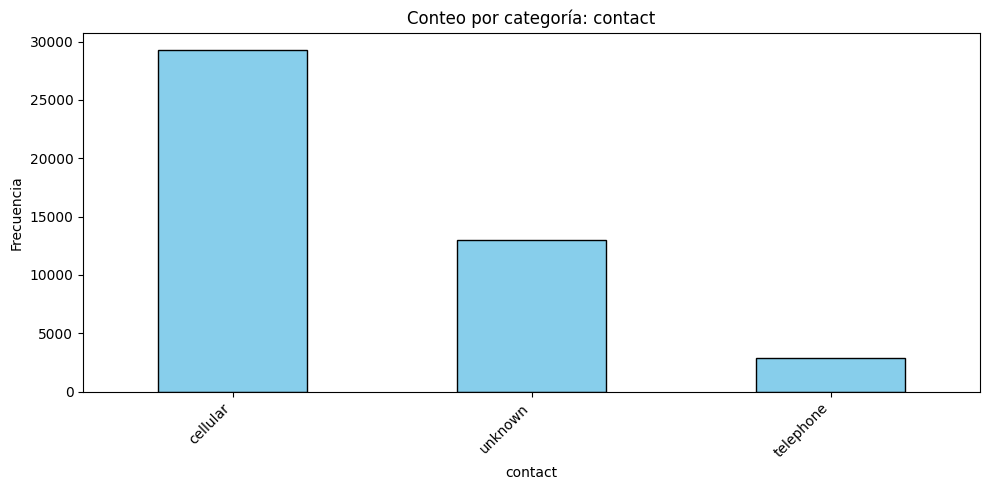

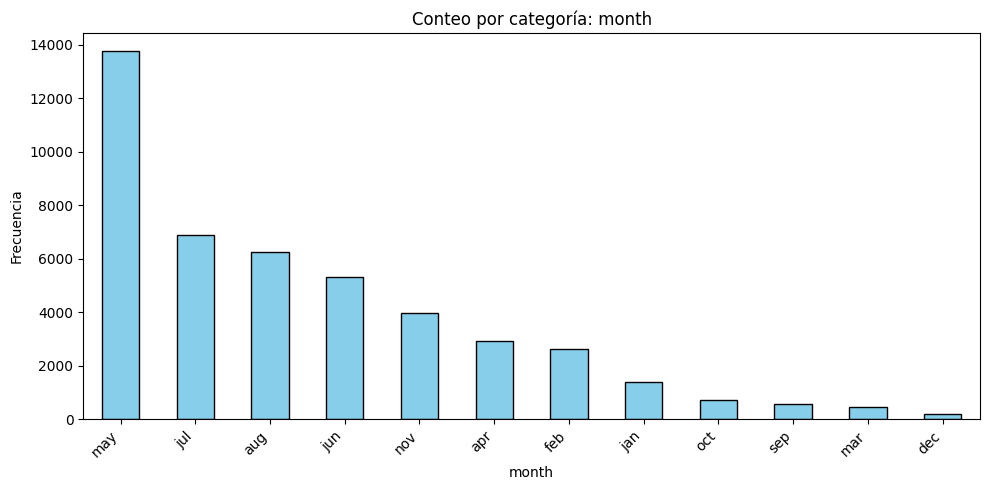

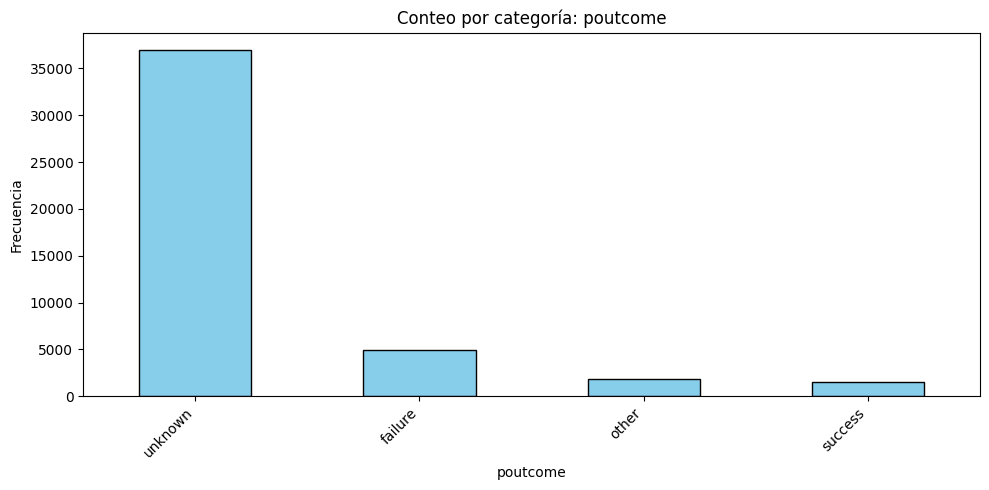

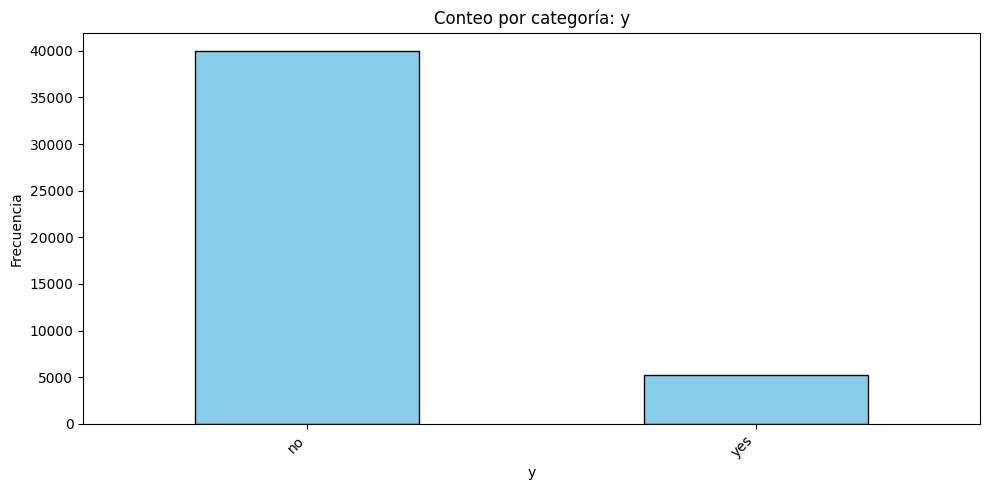

In [10]:
# Gráfico de barras para cada columna categórica en catcols usando df_clean
for col in catcols:
    plt.figure(figsize=(10, 5))
    ax = df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    ax.set_title(f'Conteo por categoría: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Limpieza de columnas que no sean almenos 95% diferentes

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


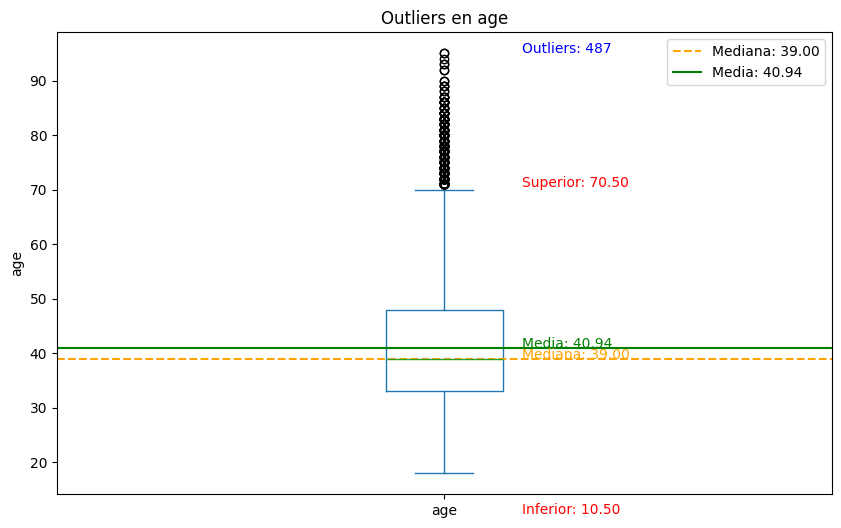

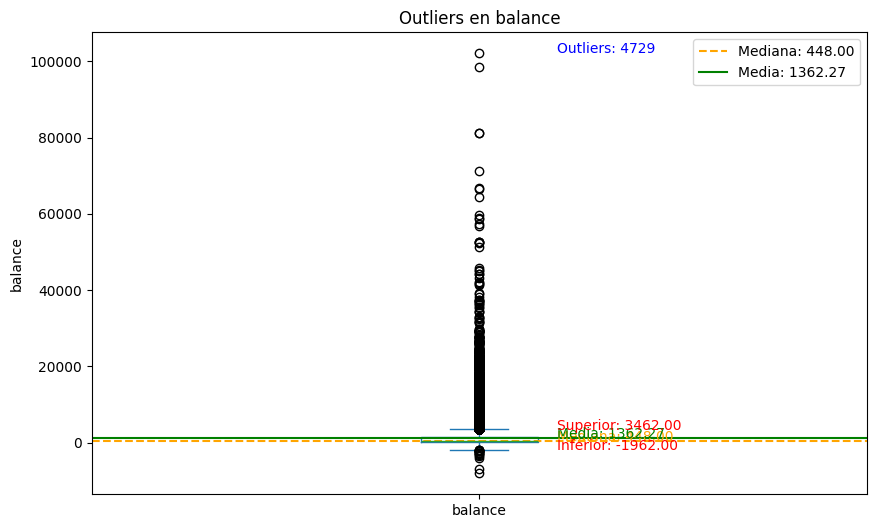

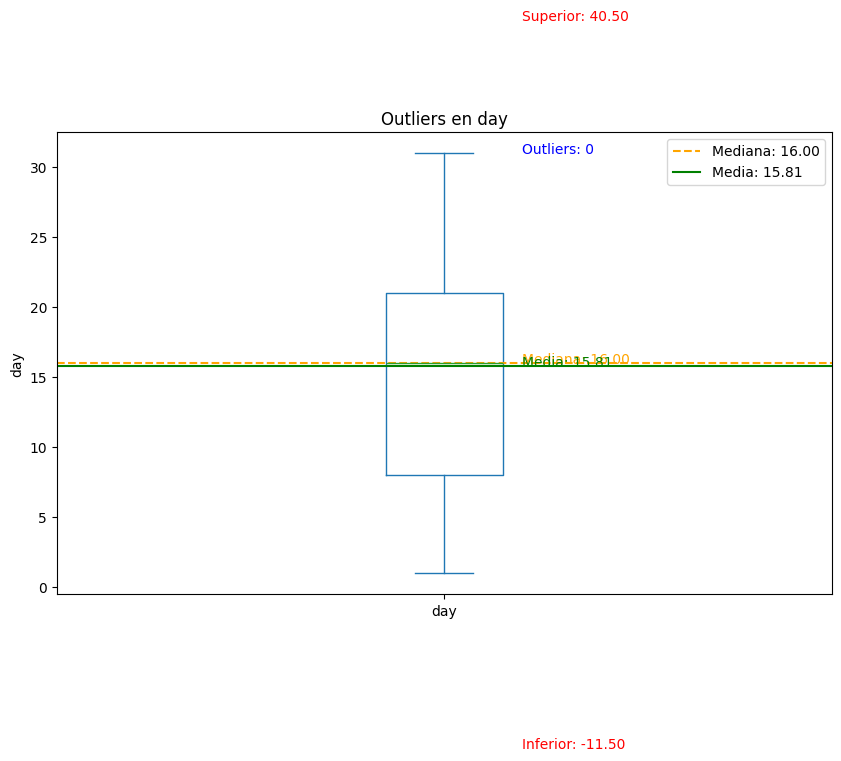

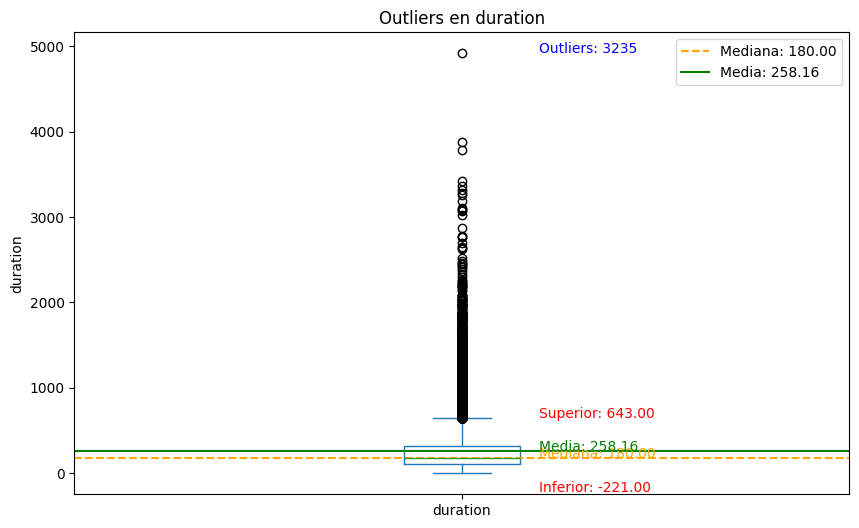

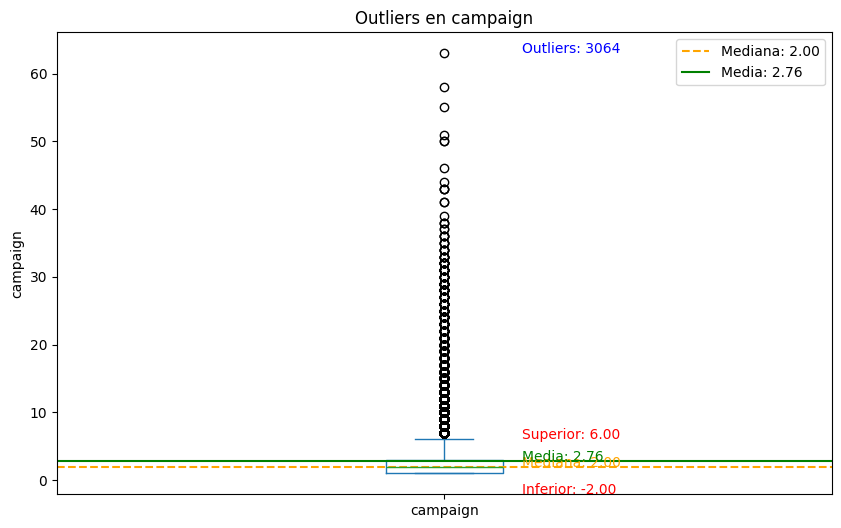

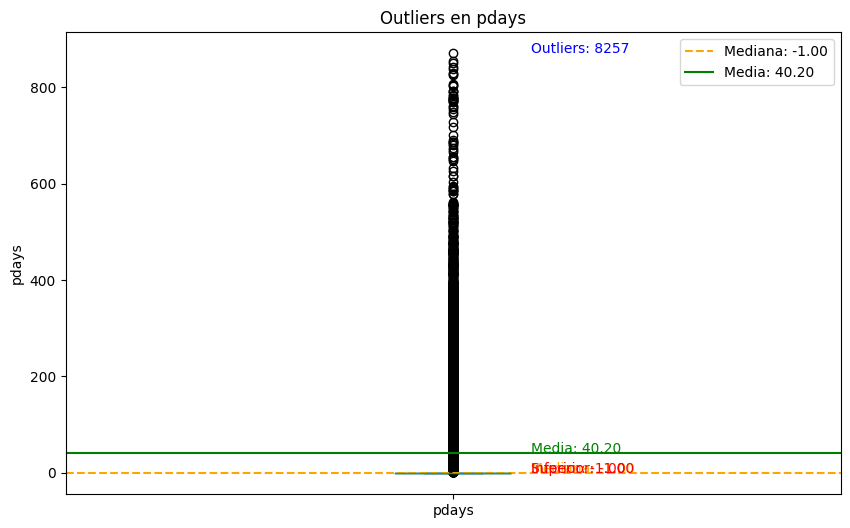

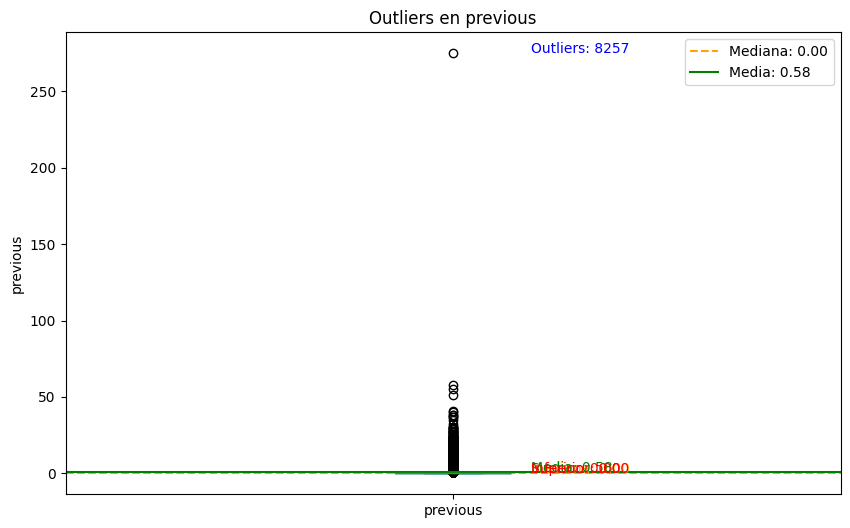

{'age': (10.5, 70.5, np.int64(487)), 'balance': (-1962.0, 3462.0, np.int64(4729)), 'day': (-11.5, 40.5, np.int64(0)), 'duration': (-221.0, 643.0, np.int64(3235)), 'campaign': (-2.0, 6.0, np.int64(3064)), 'pdays': (-1.0, -1.0, np.int64(8257)), 'previous': (0.0, 0.0, np.int64(8257))}


In [12]:
outliers = {}
X=df.drop(columns=catcols)  # Eliminar la columna objetivo 'y' para el análisis de outliers

for i in X.columns:
    plt.figure(figsize=(10, 6))
    ax = X[i].plot(kind='box', title=f'Outliers en {i}', ylabel=i)
    
    # Cálculo de la mediana y la media
    median = X[i].median()
    mean = X[i].mean()
    
    # Límites de los cuartiles
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1

    # Límites de los outliers
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    # Conteo de outliers
    outliers_count = X[(X[i] < inf) | (X[i] > sup)][i].count()

    # Agregar la información al diccionario de outliers
    outliers[i] = (float(inf), float(sup), outliers_count)

    # Anotaciones en el plot
    plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
    plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
    plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
    plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
    plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
    plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
    plt.text(x=1.1, y=max(X[i]), s=f'Outliers: {outliers_count}', color='blue')

    plt.legend()
    plt.show()

print(outliers)

Eliminación campaing

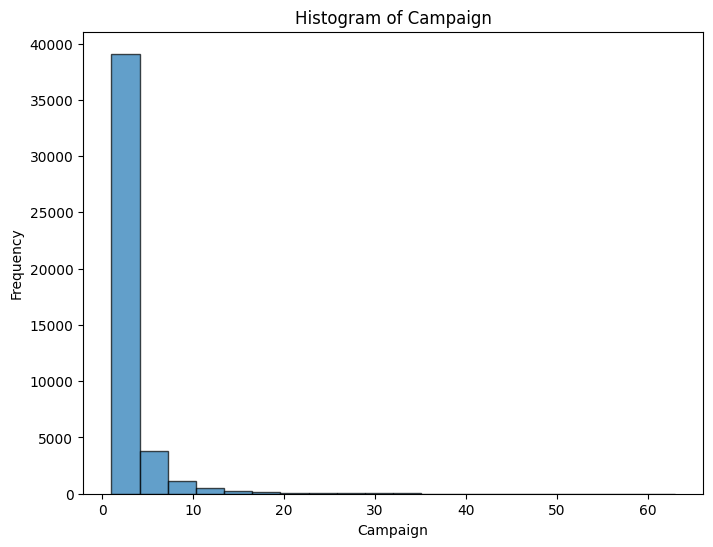

In [13]:
# Graficar el histograma de la variable 'campaign'
plt.figure(figsize=(8, 6))
plt.hist(df['campaign'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.show()

In [14]:
eliminarca = []  

columnas_eliminar=["campaign"] 

for i in df[columnas_eliminar]:
    for j in range(df.shape[0]):
        if df.loc[j, i] > 15: 
            eliminarca.append(j)

eliminarca=list(set(eliminarca))
print(eliminarca)

df_clean = df.drop(index=eliminarca)
df_clean = df_clean.reset_index(drop=True)

print(f"Filas eliminadas: {len(eliminarca)}")
print(df_clean.shape)
df_clean

[22530, 18435, 10246, 10249, 18462, 30750, 10276, 18476, 8238, 22576, 18487, 22590, 30791, 18513, 8280, 20576, 16481, 8300, 8303, 6264, 18555, 16520, 8342, 22678, 16540, 18592, 18599, 18600, 16553, 18602, 18603, 22697, 14509, 18607, 4275, 18612, 10421, 18613, 18615, 18616, 18618, 18619, 18621, 18622, 18623, 30917, 18631, 18632, 18634, 4299, 18635, 18637, 18638, 22734, 18640, 18645, 18652, 10466, 18658, 18660, 18661, 18663, 4330, 18667, 18668, 4334, 10479, 18670, 4338, 18675, 22772, 18678, 18679, 22777, 16637, 18686, 22782, 22788, 18693, 18696, 18697, 18698, 18703, 18704, 22800, 18709, 18713, 18724, 18729, 22826, 10539, 18738, 18739, 18740, 10238, 18744, 18745, 18747, 18749, 18750, 31039, 8512, 18760, 18764, 18774, 18777, 18778, 18782, 22878, 8544, 8547, 18787, 10597, 18788, 22886, 31076, 18795, 18798, 18799, 22894, 20855, 10616, 8574, 22911, 18816, 18817, 18820, 22916, 22917, 6544, 22928, 12690, 31136, 22950, 8621, 10674, 16830, 8641, 22979, 10692, 22981, 16839, 10697, 10698, 22998, 23

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44676,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
44677,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
44678,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
44679,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Eliminación previous

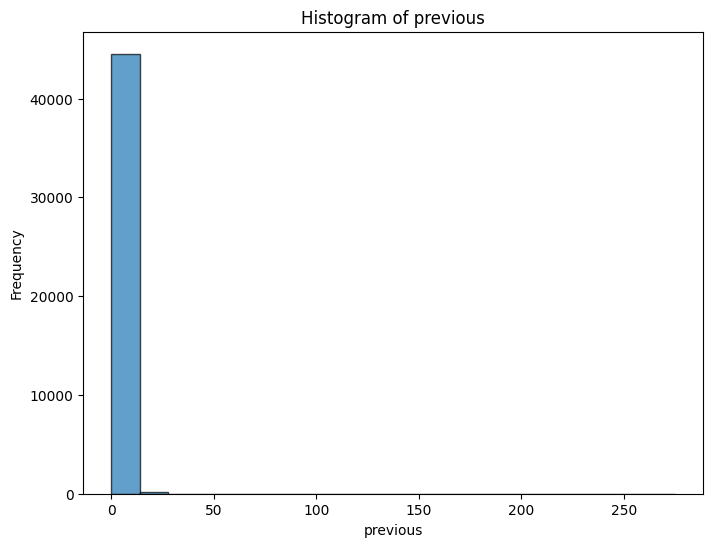

In [15]:
# Graficar el histograma de la variable 'previous'
plt.figure(figsize=(8, 6))
plt.hist(df_clean['previous'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of previous')
plt.xlabel('previous')
plt.ylabel('Frequency')
plt.show()

In [16]:
eliminarprev = []  

columnas_eliminar=["previous"] 

for i in df_clean[columnas_eliminar]:
    for j in range(df_clean.shape[0]):
        if df_clean.loc[j, i] > 25: 
            eliminarprev.append(j)

eliminarprev=list(set(eliminarprev))
print(eliminarprev)

df_clean = df_clean.drop(index=eliminarprev)
df_clean = df_clean.reset_index(drop=True)

print(f"Filas eliminadas: {len(eliminarprev)}")
print(df_clean.shape)
df_clean

[44292, 35591, 37643, 29973, 27672, 26138, 28065, 37539, 26149, 37797, 41893, 43560, 37038, 38322, 40114, 43955, 43450, 42813, 27979, 28367, 38612, 36183, 35037, 42082, 29805, 27120, 28663, 30078]
Filas eliminadas: 28
(44653, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44648,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
44649,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
44650,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
44651,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Eliminación duration

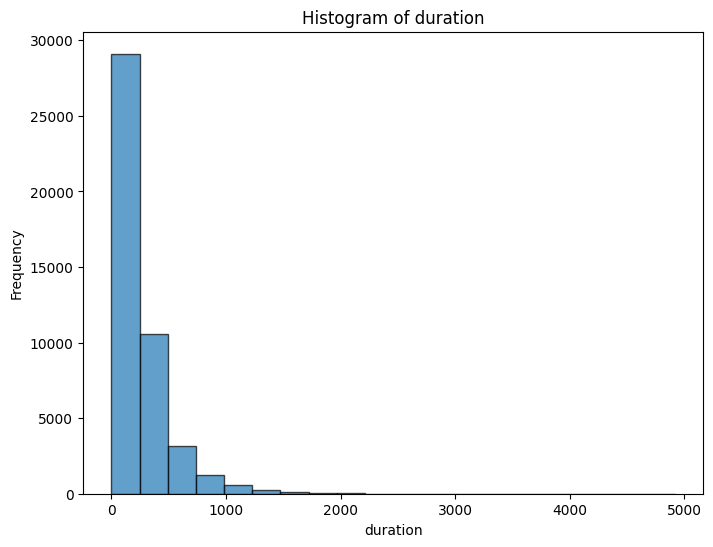

In [17]:
# Graficar el histograma de la variable 'duration'
plt.figure(figsize=(8, 6))
plt.hist(df['duration'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()

In [18]:
eliminardur = []  

columnas_eliminar=["duration"] 

for i in df_clean[columnas_eliminar].columns:
    for j in range(df_clean.shape[0]):
        inf, sup, z = outliers[i]
        if df_clean.loc[j, i] < inf or df_clean.loc[j,i] > sup : 
            eliminardur.append(j)

eliminardur=list(set(eliminardur))
print(eliminardur)

df_clean = df_clean.drop(index=eliminardur)
df_clean = df_clean.reset_index(drop=True)

print(f"Filas eliminadas: {len(eliminardur)}")
print(df_clean.shape)
print(df_clean)


[16384, 8205, 8206, 32792, 8222, 32798, 32803, 37, 16422, 16425, 43, 8236, 16429, 41010, 8243, 53, 32821, 59, 41019, 61, 41022, 41024, 41029, 8263, 24648, 16458, 41035, 8270, 41038, 83, 41044, 86, 87, 8278, 41049, 16477, 41055, 41058, 41059, 24676, 41060, 41066, 109, 16497, 41077, 16508, 8317, 16509, 16513, 130, 16517, 8326, 16518, 24716, 8334, 16527, 41104, 16529, 32915, 16532, 41107, 152, 24731, 24732, 16541, 16543, 16545, 32929, 16547, 24739, 168, 170, 41133, 32942, 179, 16564, 181, 182, 16566, 8376, 16567, 16569, 24758, 41146, 24765, 24767, 16579, 41155, 8389, 16581, 32967, 32968, 8393, 41162, 32972, 16590, 32975, 16593, 16594, 32977, 16596, 41174, 16601, 32988, 224, 16611, 41188, 231, 232, 8423, 32999, 41191, 41194, 24816, 241, 16625, 41204, 8439, 249, 16638, 33022, 8449, 16643, 24837, 41222, 8455, 16647, 41224, 24843, 8461, 16654, 271, 33038, 8465, 8466, 41235, 41236, 24854, 41239, 16664, 41246, 291, 41251, 24869, 16680, 8490, 16683, 16684, 8495, 16688, 16693, 8503, 24888, 16703,

Eliminación pdays

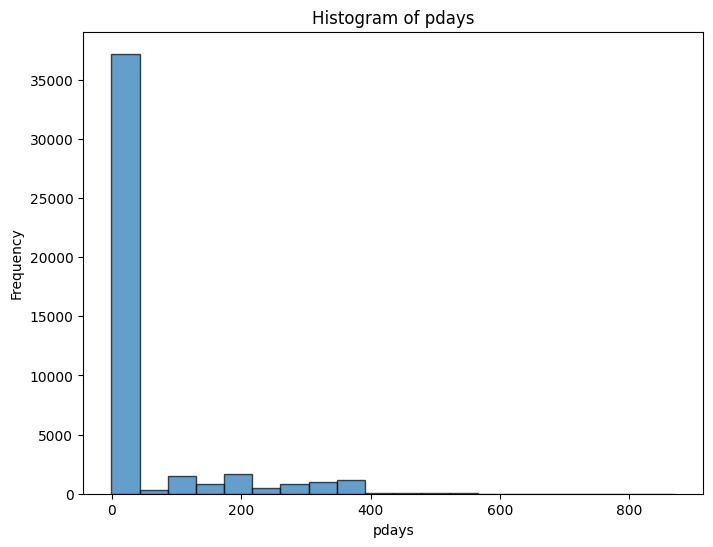

In [19]:
# Graficar el histograma de la variable 'pdays'
plt.figure(figsize=(8, 6))
plt.hist(df['pdays'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of pdays')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show()

In [20]:
eliminarpday = []  

columnas_eliminar=["pdays"] 

for i in df_clean[columnas_eliminar]:
    for j in range(df_clean.shape[0]):
        if df_clean.loc[j, i] > 400: 
            eliminarpday.append(j)

eliminarpday=list(set(eliminarpday))
print(eliminarpday)

df_clean = df_clean.drop(index=eliminarpday)
df_clean = df_clean.reset_index(drop=True)

print(f"Filas eliminadas: {len(eliminarpday)}")
print(df_clean.shape)
df_clean

[40960, 40961, 40450, 37379, 40962, 39430, 40966, 39944, 37385, 37898, 40460, 40972, 40468, 40984, 38431, 39458, 40484, 39463, 37417, 37929, 39466, 41008, 40498, 40499, 38461, 37439, 41024, 41034, 41037, 40526, 40533, 41048, 40539, 41052, 40030, 40543, 41056, 40548, 41060, 40550, 41065, 40556, 40557, 40560, 40564, 41077, 40568, 41080, 38525, 41085, 37503, 41088, 39555, 40581, 40071, 40584, 41096, 40587, 41103, 41106, 41109, 41110, 41113, 37532, 39581, 41117, 40615, 41127, 41129, 41130, 37549, 40621, 40633, 41149, 41150, 39616, 40130, 40642, 37068, 37581, 40142, 40441, 40654, 41166, 40146, 40659, 37588, 40149, 39642, 38107, 41181, 39134, 38623, 39647, 40671, 41185, 40676, 38632, 40171, 37612, 41199, 39156, 40181, 37622, 41204, 40187, 41213, 39170, 39682, 40706, 41221, 41223, 37640, 41228, 40723, 41235, 39189, 41237, 40215, 40216, 40728, 40729, 40219, 37148, 39196, 41252, 41258, 37675, 39724, 39213, 38190, 41260, 40240, 41261, 40242, 38707, 40758, 41272, 41273, 38203, 39743, 40768, 40258

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41210,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
41211,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
41212,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
41213,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


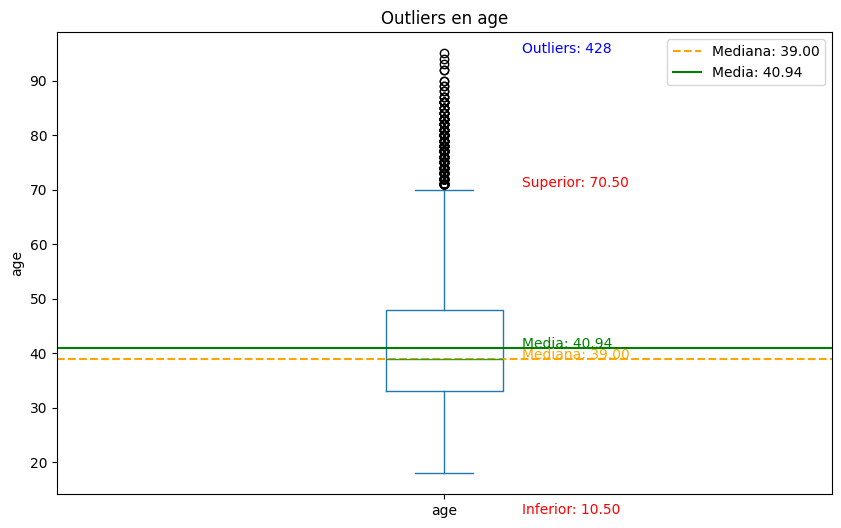

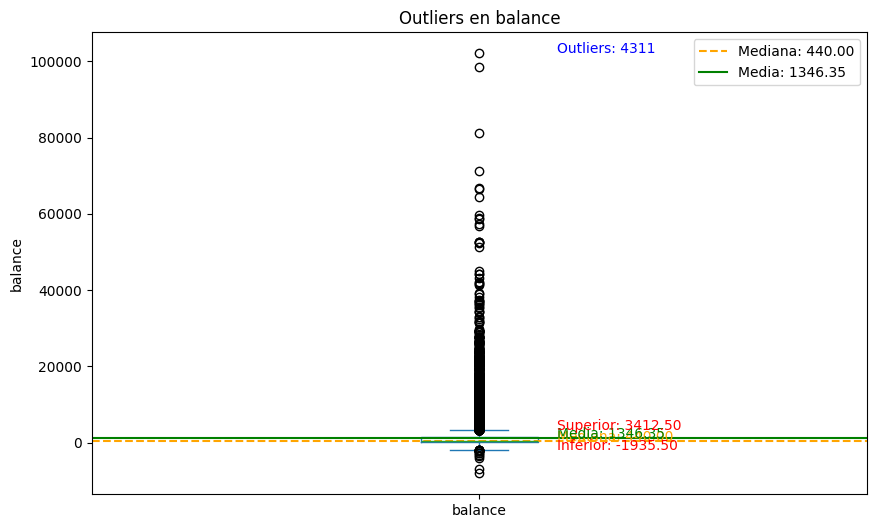

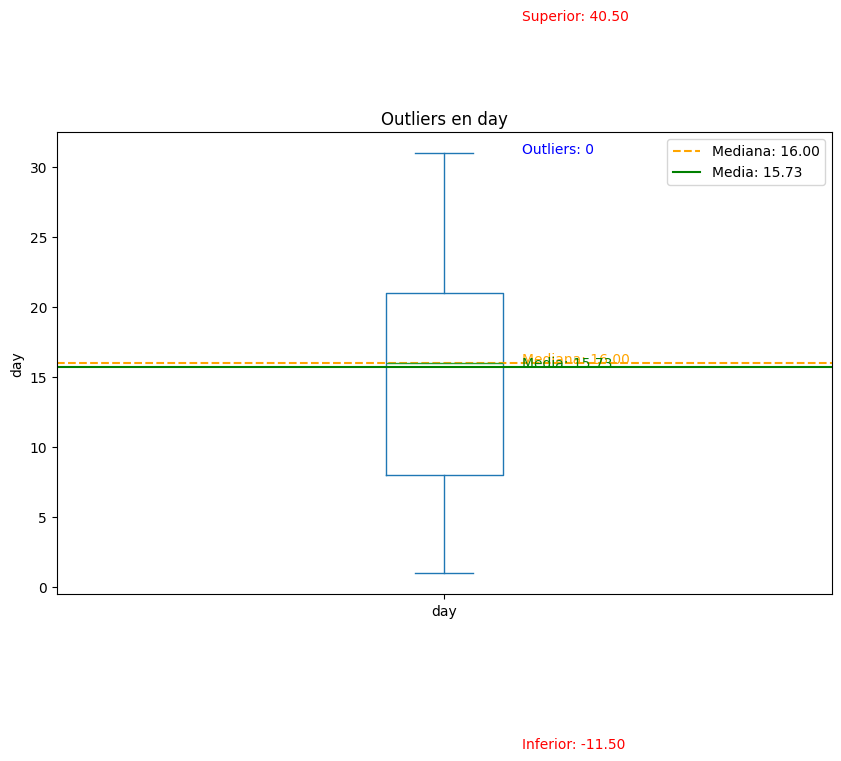

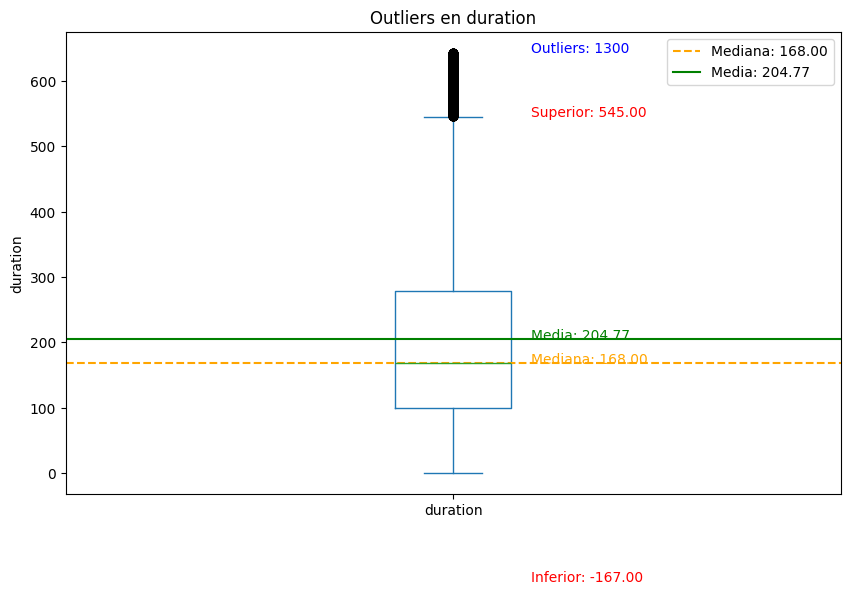

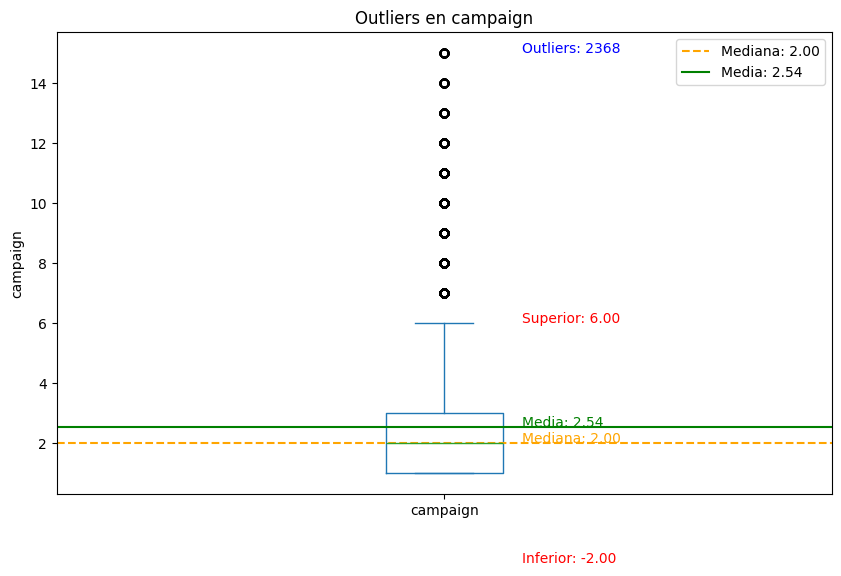

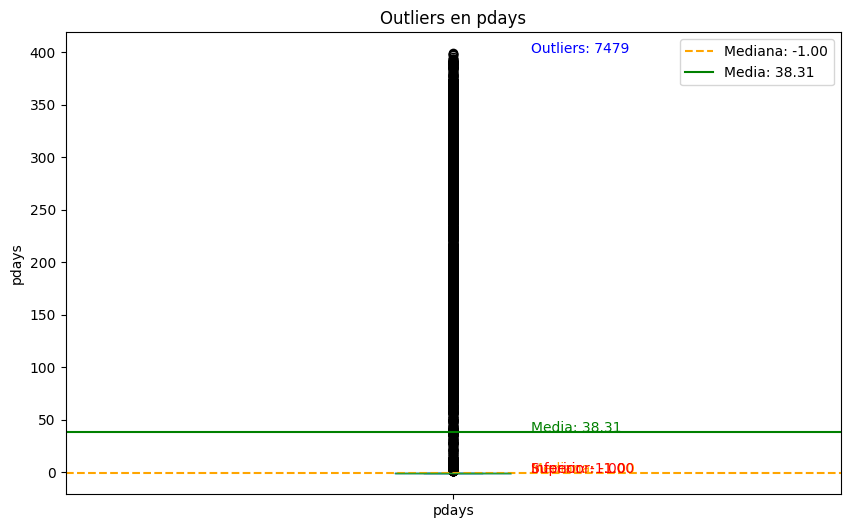

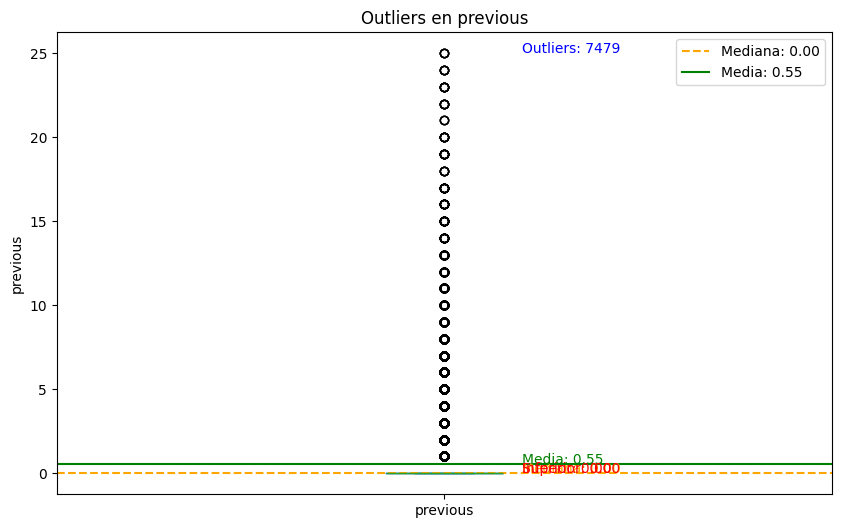

{'age': (10.5, 70.5, np.int64(487)), 'balance': (-1962.0, 3462.0, np.int64(4729)), 'day': (-11.5, 40.5, np.int64(0)), 'duration': (-221.0, 643.0, np.int64(3235)), 'campaign': (-2.0, 6.0, np.int64(3064)), 'pdays': (-1.0, -1.0, np.int64(8257)), 'previous': (0.0, 0.0, np.int64(8257))}


In [21]:
import matplotlib.pyplot as plt
x2=df_clean.drop(columns=catcols)  
# Itera sobre cada columna de df_clean
for i in x2.columns:
    plt.figure(figsize=(10, 6))
    
    # Gráfico de caja para la columna actual
    ax = df_clean[i].plot(kind='box', title=f'Outliers en {i}', ylabel=i)
    
    # Cálculo de estadísticas
    median = df_clean[i].median()
    mean = df_clean[i].mean()
    Q1 = df_clean[i].quantile(0.25)
    Q3 = df_clean[i].quantile(0.75)
    IQR = Q3 - Q1

    # Límites de los outliers
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    # Conteo de outliers
    outliers_count = df_clean[(df_clean[i] < inf) | (df_clean[i] > sup)][i].count()

    # Anotaciones en el gráfico
    plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
    plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
    plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
    plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
    plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
    plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
    plt.text(x=1.1, y=max(df_clean[i]), s=f'Outliers: {outliers_count}', color='blue')

    plt.legend()
    plt.show()

print(outliers)

CVS hector sin dummies

In [22]:
#eliminar filas de campaing
df_final=df.drop(index=eliminarca)
df_final= df_final.reset_index(drop=True)

#eliminar filas de previuos
df_final=df_final.drop(index=eliminarprev)
df_final= df_final.reset_index(drop=True)

#elimnar filas duration
df_final = df_final.drop(index=eliminardur)
df_final = df_final.reset_index(drop=True)


#elimnar filas duration

df_final = df_final.drop(index=eliminarpday)
df_final = df_final.reset_index(drop=True)

#eliminar columnas 
df_final = df_final.drop(columns=['default', 'poutcome'])


df_final


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41210,73,retired,married,secondary,2850,no,no,cellular,17,nov,300,1,40,8,yes
41211,25,technician,single,secondary,505,no,yes,cellular,17,nov,386,2,-1,0,yes
41212,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,-1,0,yes
41213,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,-1,0,no


In [23]:
df_final.to_csv('bank-full-clean.csv', index=False)